**1. Loading and viewing data**

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# load the data
df = pd.read_csv('/kaggle/input/world-happiness/2019.csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [3]:
df.tail()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


In [4]:
df.shape

(156, 9)

In [5]:
df.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [6]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [7]:
df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

****2. preprocessing****

In [8]:
# to find number of null values
df.isna().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [9]:
# to find duplicates
df.loc[df.duplicated()]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption


In [10]:
# check for duplicate country name
df.loc[df.duplicated(subset=['Country or region'])].head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption


In [14]:
# renaming the columns
df = df.rename(columns={
    'Overall rank':'Rank', 
    'Country or region':'Country', 
    'GDP per capita':'GDP_per_capita',
    'Social support':'Support', 
    'Healthy life expectancy':'Life_expectancy',
    'Freedom to make life choices':'Choice_freedom',
    'Perceptions of corruption':'Corruption'
})

In [20]:
# Checking an example duplicate
df.query('Country == "United States"')

,Rank,Country,Score,GDP_per_capita,Support,Life_expectancy,Choice_freedom,Generosity,Corruption
18,19,United States,6.892,1.433,1.457,0.874,0.454,0.28,0.128


**3. Feature Understating/ Univariate Analysis**

In [28]:
df['Score'].value_counts()

5.208    2
7.769    1
4.883    1
4.812    1
4.799    1
        ..
5.940    1
5.895    1
5.893    1
5.890    1
2.853    1
Name: Score, Length: 155, dtype: int64

Text(0, 0.5, 'Counts')

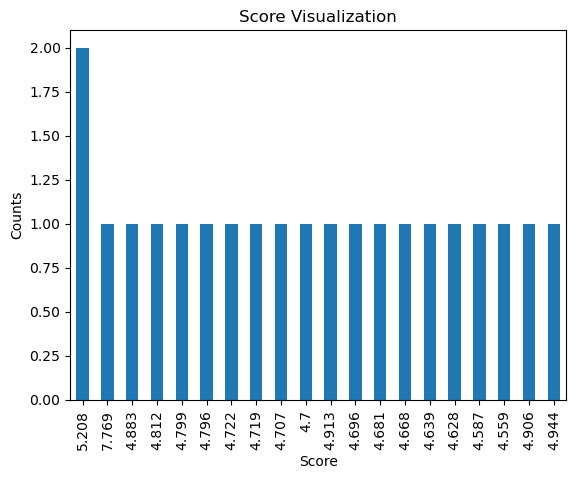

In [33]:
# histogram
ax = df['Score'].value_counts() \
    .head(20)\
    .plot(kind='bar', title='Score Visualization')
ax.set_xlabel('Score')
ax.set_ylabel('Counts')

**4. Feature Relationships**

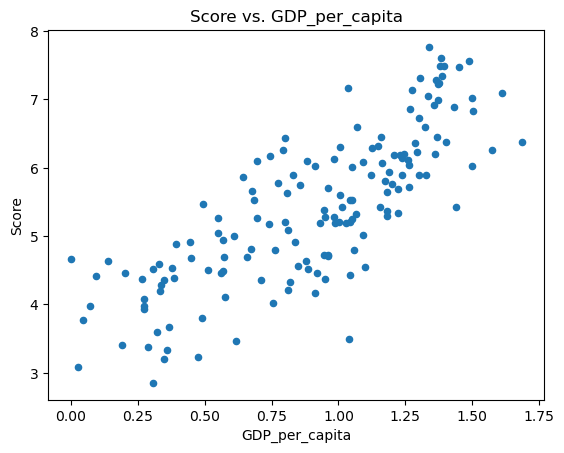

In [34]:
df.plot(kind='scatter',
        x='GDP_per_capita',
        y='Score',
        title='Score vs. GDP_per_capita')
plt.show()

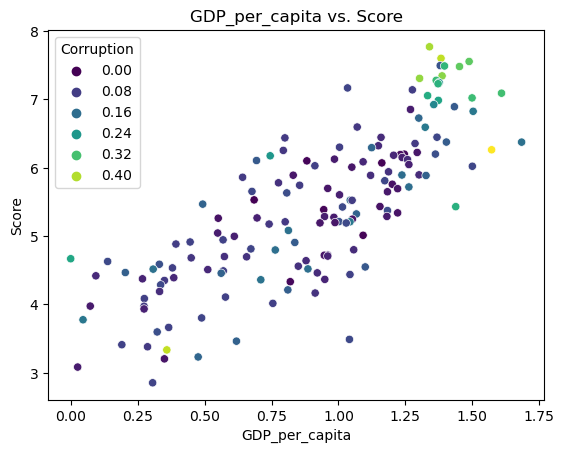

In [38]:
ax = sns.scatterplot(y='Score',
                x='GDP_per_capita',
                hue='Corruption',
                data=df,palette='viridis')
ax.set_title('GDP_per_capita vs. Score')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


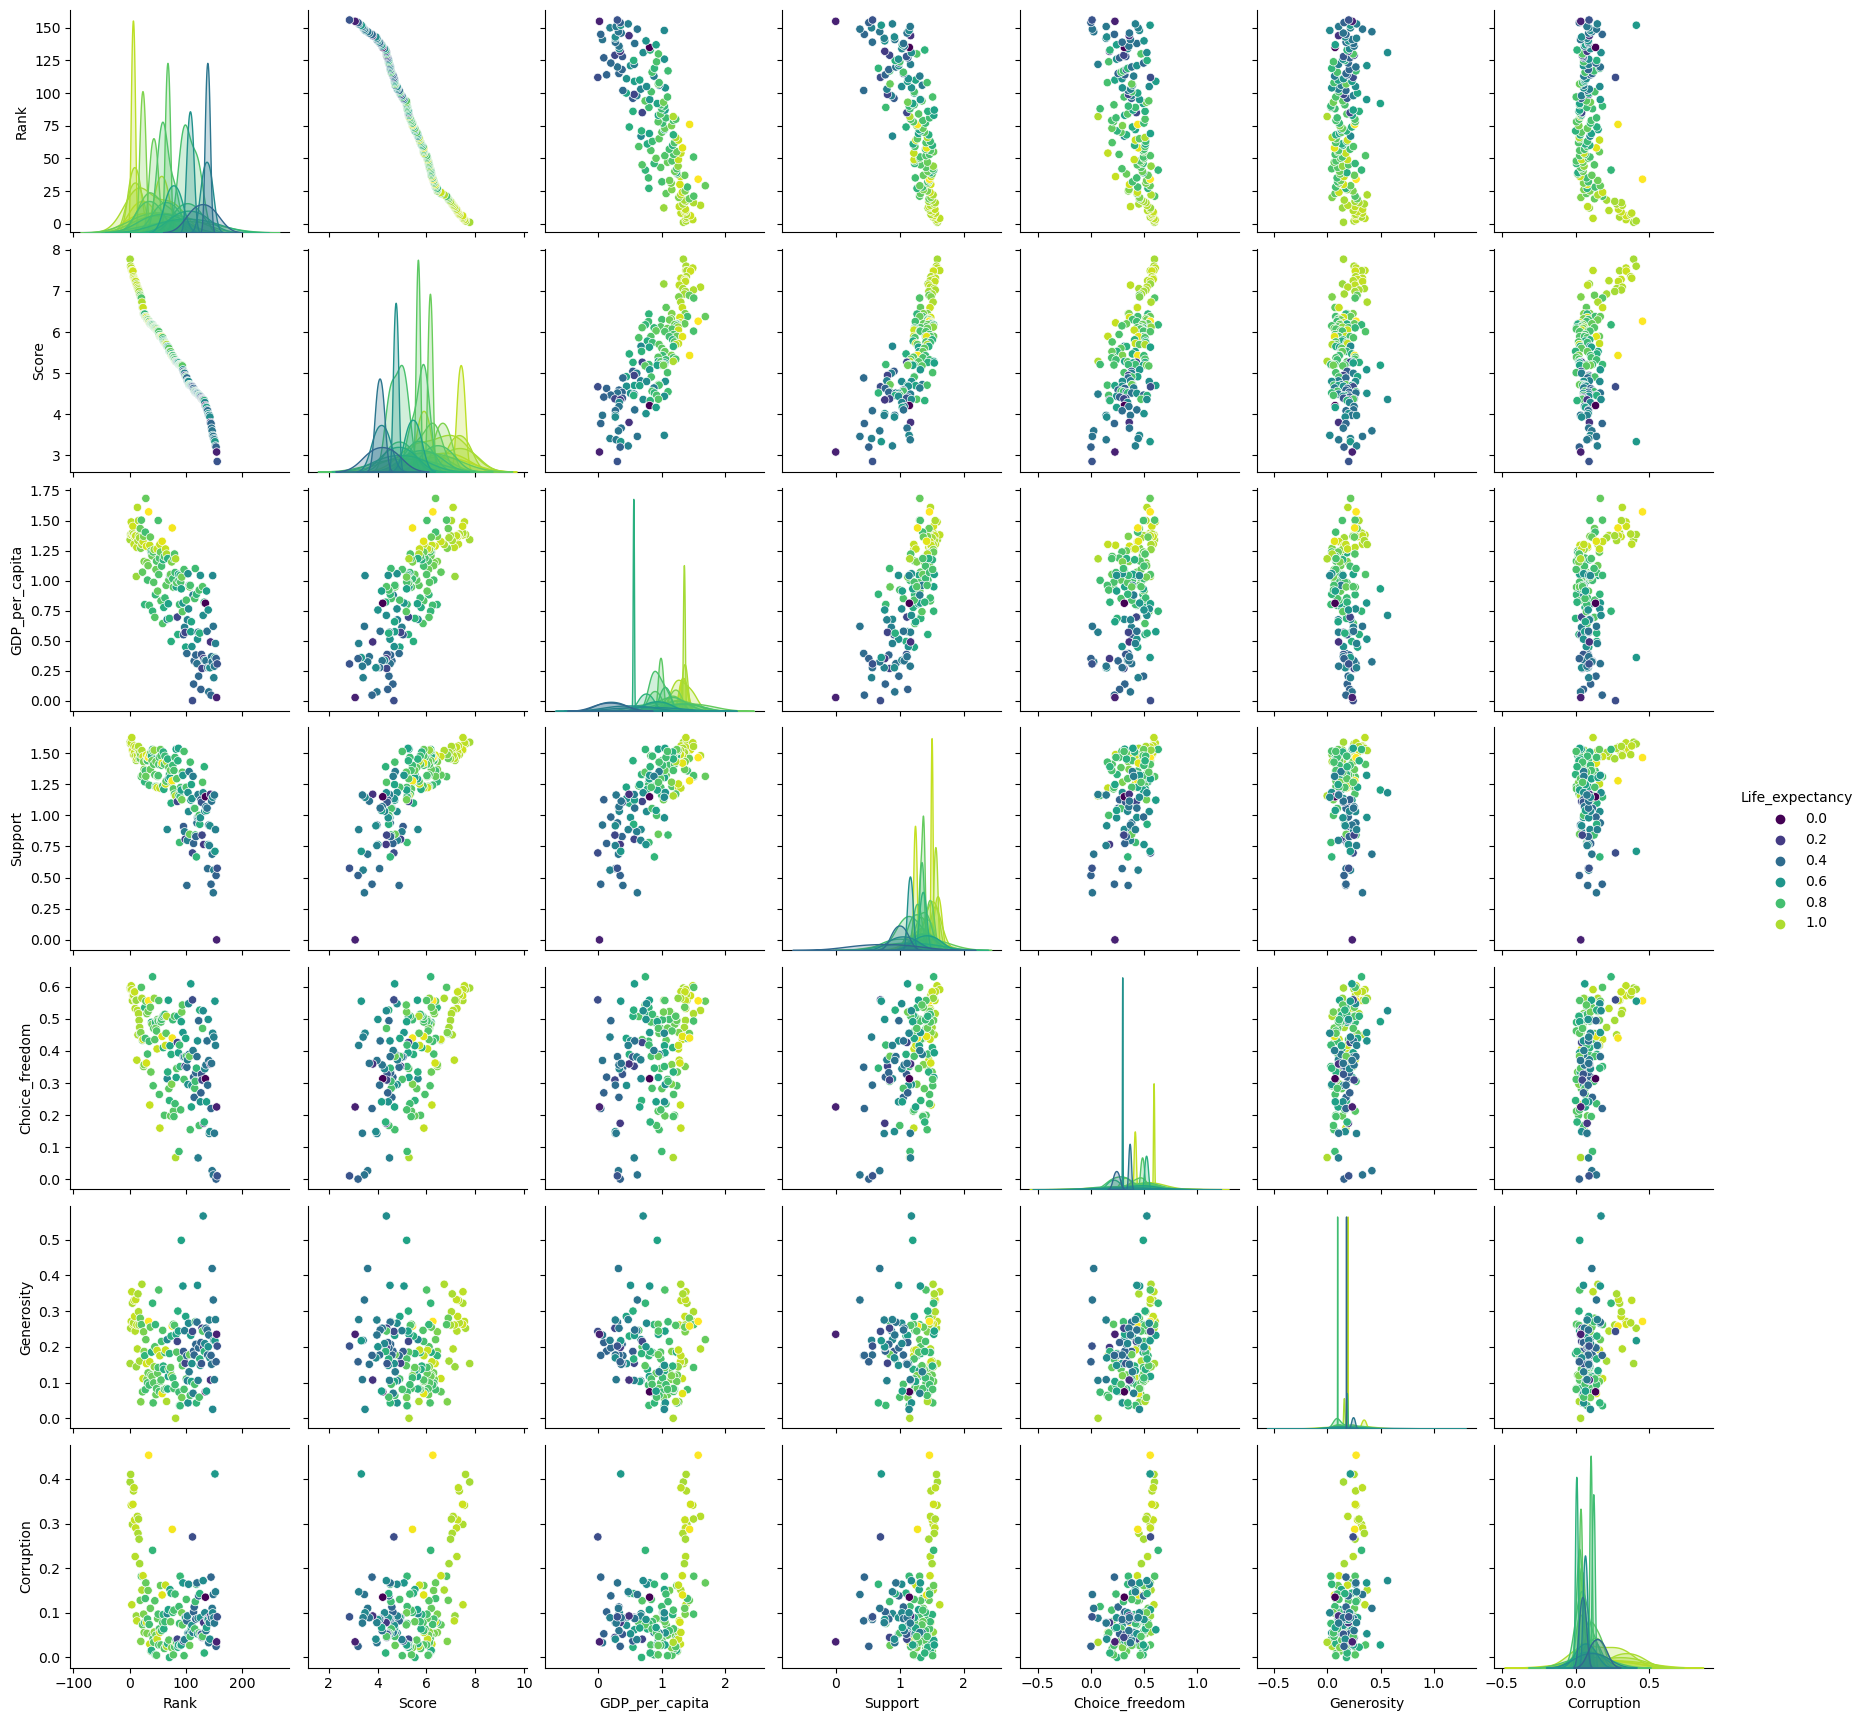

In [39]:
sns.pairplot(df,hue='Life_expectancy',palette='viridis')

**lets create a model**

In [40]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [41]:
df.columns

Index(['Rank', 'Country', 'Score', 'GDP_per_capita', 'Support',
       'Life_expectancy', 'Choice_freedom', 'Generosity', 'Corruption'],
      dtype='object')

In [44]:
X = df[['GDP_per_capita', 'Support',
       'Life_expectancy', 'Choice_freedom', 'Generosity', 'Corruption']]
y = df.Score

In [45]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [46]:
X_train.shape,y_test.shape

((124, 6), (32,))

In [47]:
lr.fit(X_train,y_train)

LinearRegression()

In [48]:
lr.score(X_test,y_test)

0.7280199675089485

**Testing**

In [49]:
# testing with a country
df.query('Country == "Spain"')

,Rank,Country,Score,GDP_per_capita,Support,Life_expectancy,Choice_freedom,Generosity,Corruption
29,30,Spain,6.354,1.286,1.484,1.062,0.362,0.153,0.079


In [51]:
predictions = lr.predict([[1.286,1.484,1.062,0.362,0.153, 0.079]])
predictions[0]

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


6.301943757826151

In [53]:
(6.301943757826151 / 6.354 )*100

99.1807327325488

**The predicted score is 99% equivalent to the actual score, thus the model performs well**